# Heartbeatproject

## Project describtion
The heart signals described within electrocardiograms (ECGs) describe the heartbeats of normal patients and patients with arrhythmias or myocardial infarction. <br>
The goal of this project is to implement deep neural network architectures that will help in the classification of cardiac signals. Transfer learning techniques can also be studied within this project.


## Electrocardiograms
An electrocardiogram (ECG or EKG) is a medical test that records the electrical activity of the heart over a period of time using electrodes placed on the skin. These electrical impulses cause the heart muscles to contract and pump blood. The ECG captures this activity in the form of a graph with various waves and intervals, each representing different phases of the cardiac cycle. It's commonly used to detect heart conditions, such as arrhythmias, heart attacks, and other cardiac abnormalities. <br>

ECG Cycle:
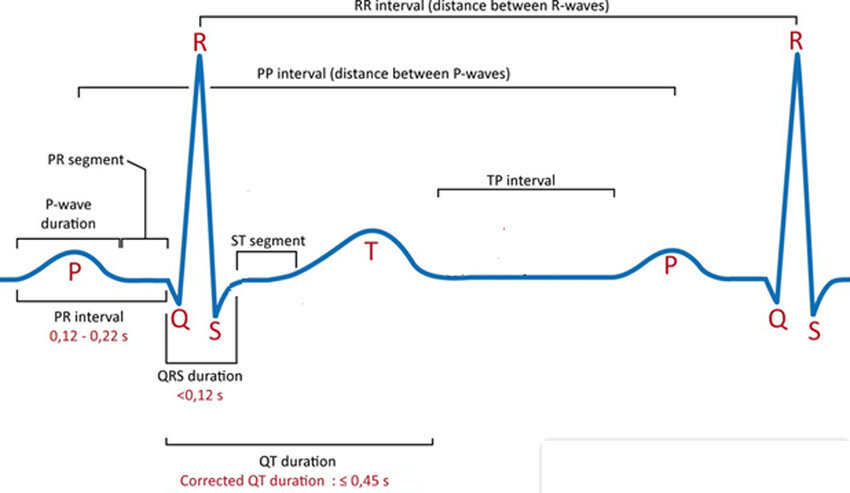

## Available data
There are two datasets available from Kaggle (https://www.kaggle.com/shayanfazeli/heartbeat). <br>

__Dataset 1: MIT-BIH Arrhythmia Dataset (MIT)__ <br>
Describes different Arryhtmias (?? Helene?) <br>
Original source of the dataset: https://www.physionet.org/content/mitdb/1.0.0/


__Dataset 2: PTB Diagnostic ECG Database (PTB)__ <br>
Describes different Sicknesses (?? Helene?) <br>
Original source of the dataset: https://www.physionet.org/content/ptbdb/1.0.0/

Both datasets describe different medical conditions and can therefore not be combined. <br>
We have decided to use the MIT-BIH Arrythmia Dataset (MIT) as it has a high er number of individual heartbeats. 

__Describtion of the MIT-dataset__: <br>
__Measurement-Type:__ 2-channel ESC with a 30 min measurement <br>
__Device:__ Del-Mar Avionics model 445 (9 different ones of the same type were used), Resulution: 11 bit, Filter: Bandpass (0.1 ... 100 Hz), Sampling: 360 Hz <br>
__Patients:__ 48 records of 47 patients (23 records choosen randomly, 25 records to include clinically important phenomena), 25 men (32 ... 89 years), 22 women (23 ... 89 years). Additional information: medication, age, gender, diagnosis divided into 20 classes <br>

__Limitation Kaggle-Dataset:__ <br>
Classes were grouped into five classes <br>
ECG data was downsampled to 125 Hz and Min-Max-Scaled on 0...1<br>
Additional information (medication, age, gender) is not available <br>
Classes:
- 0: N: Normal beat
- 1: S: Supraventricular premature beat
- 2: V: Premature ventricular contraction
- 3: F: Fusion of ventricular and normal beat
- 4: Q: Unclassifiable beat


## Data Exploration

In [1]:
#Import packages and data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
# Header=None as there is no header (otherwise the first measurement would be used to name the columns)
df=pd.read_pickle("../data/MIT_Heartbeat_original_fs180hz")  

print("\n ------------------- Original Dataset -------------------")
df.info()


 ------------------- Original Dataset -------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105416 entries, 0 to 105415
Columns: 636 entries, record to v5_314
dtypes: float64(630), object(6)
memory usage: 511.5+ MB


In [4]:
# Does this give us any important information?
display(df.describe())
df.head()

,l2_0,l2_1,l2_2,l2_3,l2_4,l2_5,l2_6,l2_7,l2_8,l2_9,...,v5_305,v5_306,v5_307,v5_308,v5_309,v5_310,v5_311,v5_312,v5_313,v5_314
count,105416.000000,105416.000000,105416.000000,105416.000000,105416.000000,105416.000000,105416.000000,105416.000000,105416.000000,105416.000000,...,105416.000000,105416.000000,105416.000000,105416.000000,105416.000000,105416.000000,105416.000000,105416.000000,105416.000000,105416.000000
mean,-0.000113,-0.000121,-0.000127,-0.000133,-0.000130,-0.000128,-0.000130,-0.000135,-0.000138,-0.000155,...,0.000014,0.000018,0.000020,0.000018,0.000014,0.000016,0.000016,0.000016,0.000011,0.000004
std,0.005247,0.005304,0.005311,0.005339,0.005375,0.005416,0.005370,0.005333,0.005389,0.007226,...,0.004284,0.004250,0.004235,0.004220,0.004233,0.004327,0.004390,0.004481,0.004626,0.005125
min,-0.546002,-0.544033,-0.532216,-0.538125,-0.528278,-0.518430,-0.522369,-0.514492,-0.504644,-1.563696,...,-0.428118,-0.423188,-0.421544,-0.434691,-0.467559,-0.531652,-0.608892,-0.668055,-0.677915,-0.756222
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.502637,0.496854,0.510348,0.504565,0.516131,0.537337,0.514204,0.479504,0.519987,0.535409,...,0.352881,0.343318,0.336942,0.330567,0.340130,0.343318,0.336942,0.349693,0.356069,0.340130


,record,age,gender,medication,device,class,l2_0,l2_1,l2_2,l2_3,...,v5_305,v5_306,v5_307,v5_308,v5_309,v5_310,v5_311,v5_312,v5_313,v5_314
0,100,69,M,"Aldomet, Inderal",G,N,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100,69,M,"Aldomet, Inderal",G,N,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100,69,M,"Aldomet, Inderal",G,N,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100,69,M,"Aldomet, Inderal",G,N,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100,69,M,"Aldomet, Inderal",G,N,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__Data overview (1):__
- Columns represent the time-axis of the heartbeat (180 Hz sampling rate -> 1/189Hz = 5.555 ms time difference)

old - not updated
- Columns 0... 186: Time signal (max time of one Heartbeat: 187*8ms=1.496 s)
- Column 187: Target/class of the heartbeat
- Timesignal is zero-padded after one heartbeat is finished (each Heartbeat has a different length).
- About 40% of the columns are zero-padded. 
- Combined dataset contains 109446 entries
- Train dataset contains 87554 entries (~80%)
- Test dataset contains 21891 entries (~20%)


In [13]:
df.iloc[:, 5:6+315]

,class,l2_0,l2_1,l2_2,l2_3,l2_4,l2_5,l2_6,l2_7,l2_8,...,l2_305,l2_306,l2_307,l2_308,l2_309,l2_310,l2_311,l2_312,l2_313,l2_314
0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105412,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105413,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105414,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


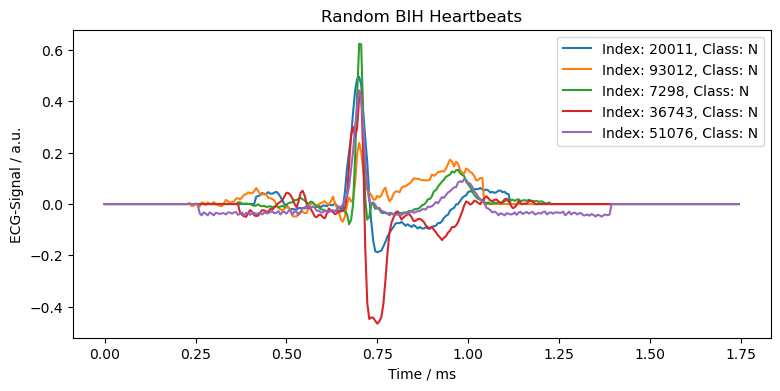

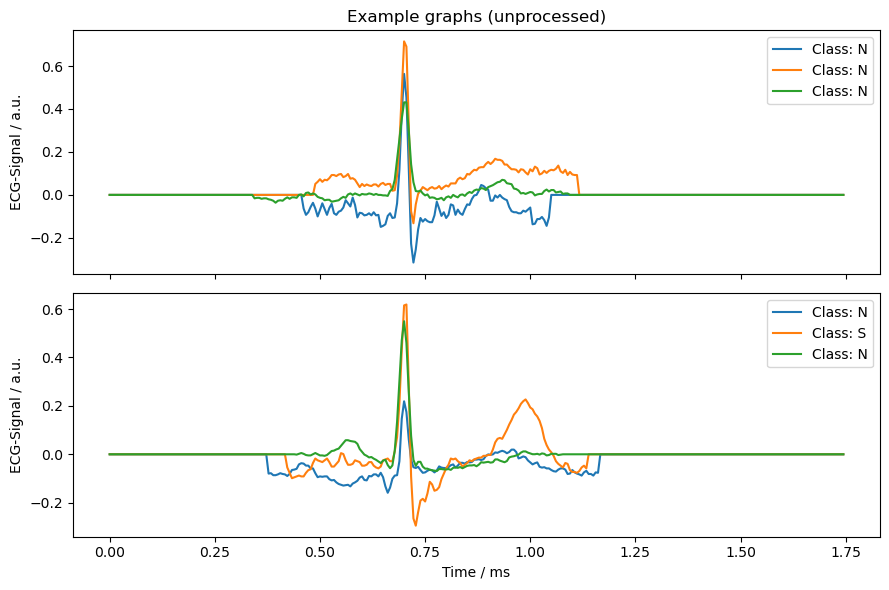

In [21]:
# Overview of some graphs
plt.figure(figsize=(9,4))
plt.title("Random BIH Heartbeats")
for idx in np.random.randint(df.shape[0], size=5):
    plt.plot(np.arange(0, 315)*(1/180), df.iloc[idx, 6:6+315], label=f"Index: {idx}, Class: {df.iloc[idx, 5]}")
plt.xlabel("Time / ms")
plt.ylabel("ECG-Signal / a.u.")
plt.legend()

idxs =[65287 , 64061, 49609, 94785, 99157,  102986]
fig, ax = plt.subplots(2, 1, figsize=(9,6), sharex=True)
for idx in idxs[0:3]:
    ax[0].plot(np.arange(0, 315)*(1/180), df.iloc[idx, 6:6+315], label=f"Class: {(df.iloc[idx, 5])}")
for idx in idxs[3:]:
    ax[1].plot(np.arange(0, 315)*(1/180), df.iloc[idx, 6:6+315], label=f"Class: {(df.iloc[idx, 5])}")

ax[0].set_title("Example graphs (unprocessed)")
ax[0].set_ylabel("ECG-Signal / a.u.")
ax[1].set_ylabel("ECG-Signal / a.u.")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[1].set_xlabel("Time / ms")
plt.tight_layout()
#plt.savefig("DataExploration_ExampleTimedata.png")

In [23]:
#Set Column names: (I erased the extra copy of the dataset)
"""
# Column-names for the timedatam (0-186)
time_index = [f'{i*8} ms' for i in range(187)]
# Column name for the categroy (index 187)
time_index.append('Category')
# Indexspalte in Kopie des Dataframes
df_test.columns = time_index
df_train.columns = time_index
df.columns = time_index

# convert Category to int
df_test["Category"] = df_test["Category"].astype(int)
df_train["Category"] = df_train["Category"].astype(int)
df["Category"] = df["Category"].astype(int)

df.head()
"""

'\n# Column-names for the timedatam (0-186)\ntime_index = [f\'{i*8} ms\' for i in range(187)]\n# Column name for the categroy (index 187)\ntime_index.append(\'Category\')\n# Indexspalte in Kopie des Dataframes\ndf_test.columns = time_index\ndf_train.columns = time_index\ndf.columns = time_index\n\n# convert Category to int\ndf_test["Category"] = df_test["Category"].astype(int)\ndf_train["Category"] = df_train["Category"].astype(int)\ndf["Category"] = df["Category"].astype(int)\n\ndf.head()\n'

In [26]:
def check_NaN_Zero(df, describtion):
    # Amount values (Timedata)
    total_values = df.shape[0]*(df.shape[1]-1)  # -1 to skip the target-column

    # Amount NaN-Values (Timedata)
    nan_counts = df.iloc[:, 0:-1].isna().sum().sum()  # iloc[..] to skip the target-column

    # Amount Zero-Values (Timedata))
    zero_counts = (df.iloc[:, 0:-1] == 0).sum().sum()

    # Percentage 
    nan_percentage = (nan_counts / total_values) * 100
    zero_percentage = (zero_counts / total_values) * 100

    print(f"---- {describtion} ---- ")
    print(f"Amount NaN-Values in {describtion}-dataset:  {nan_percentage:.2f}%")
    print(f"Amount Zero-Values in {describtion}-dataset: {zero_percentage:.2f}%")


check_NaN_Zero(df, 'combined')


---- combined ---- 
Amount NaN-Values in combined-dataset:  0.00%
Amount Zero-Values in combined-dataset: 54.60%


__Data overview (2):__
- NaN-Values: There are no NaN-Values in the Dataset
- Zero-Values: Zeropadding is about equal in the test/train/combined dataset with ~ 41%

In [33]:
# Check for outliers in the dataset
# Doesn't really make sense, as all are normalized (max-normalised for each patient (not overall))
"""
index_signal = np.arange(6, 6+315)

# Check for normalization errors:
rows_maxerror = (df.iloc[:, index_signal].max(axis=1) >= 1).sum()
rows_minerror = (df.iloc[:, index_signal].min(axis=1) != 0).sum()
rows_minmaxerror = ((df.iloc[:, index_signal].min(axis=1) != 0) | (df.iloc[:, index_signal].max(axis=1) != 1)).sum()
print(f"Amount of rows where max >= 1: {rows_maxerror}")
print(f"Amount of rows where min != 0: {rows_minerror}")
print(f"Amount of rows with both conditions: {rows_minmaxerror}")
time = np.arange(0, 315)*(1/180)

df_minerror = df[(df.iloc[:, index_signal].min(axis=1) != 0)]
df_maxerror = df[(df.iloc[:, index_signal].max(axis=1) >= 1)]


# No 0s in dataset:
print("Category of rows with min-error")
display(df_minerror["class"].value_counts())
plt.figure(figsize=(13,5))
plt.title('Min-Error')
plt.plot(time, df_minerror.iloc[:, index_signal].transpose())
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (arb. unit)')
# Min-Error-Rows will be droped:
#df = df.drop(df[(df.iloc[:, index_signal].min(axis=1) != 0)].index, axis=0)


# no 1s in dataset
print("Category of rows with max-error")
display(df_maxerror["class"].value_counts())


plt.figure(figsize=(13,5))
plt.title('Max-Error')
plt.plot(time, df_maxerror.iloc[:, index_signal].transpose())
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (arb. unit)')

#df = df.drop(df[(df.iloc[:, :-1].max(axis=1) != 1)].index, axis=0)
# df_test = df_test.drop(df_test[(df_test.iloc[:, index_signal].max(axis=1) != 1)].index, axis=0)
# df_train = df_train.drop(df_train[(df_train.iloc[:, index_signal].max(axis=1) != 1)].index, axis=0)


# Check where the 0s occur and there is a max-error
df_maxerror_and_zero = df[(df.iloc[:, index_signal].max(axis=1) != 1) & (df.iloc[:, :-1].min(axis=1) == 0)]
zeros = (df_maxerror_and_zero.iloc[:, index_signal] == 0).sum()
plt.figure(figsize=(13,5))
plt.plot(time, zeros)
plt.ylim([0, 10])
plt.xlabel('Time (ms)')
plt.ylabel('Amount of 0 occurance')
plt.title('0-occurance when there is a max-error')

"""

Amount of rows where max >= 1: 21
Amount of rows where min != 0: 103876
Amount of rows with both conditions: 105406
Category of rows with min-error


class
N    86381
Q     7894
V     6163
S     2734
F      704
Name: count, dtype: int64

Category of rows with max-error


class
N    12
V     5
S     2
Q     1
F     1
Name: count, dtype: int64

TypeError: '<=' not supported between instances of 'str' and 'float'

Error in callback <function flush_figures at 0x0000019FE07B7B00> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Category
0    395
1    325
2    252
3      1
Name: count, dtype: int64

Amount of rows where max != 1: 225
Amount of rows where min != 0: 83
Amount of rows with both conditions: 254


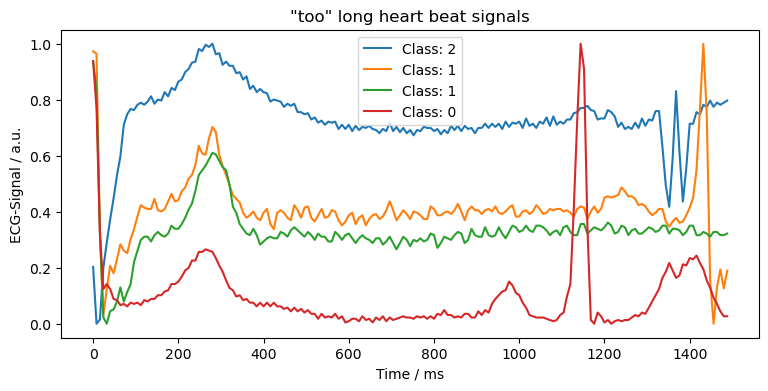

In [147]:
# Get df where the last ECG-column is != 0 and plot random rows out of this subset
df_toshort = df[(df.iloc[:, -2] != 0)]
display(df_toshort.iloc[:,-1].value_counts())
plt.figure(figsize=(9,4))
plt.title("Random Heartbeats ([:,-2] != 0)")
plt.title('"too" long heart beat signals')
for idx in np.random.randint(df_toshort.shape[0], size=4):
    #plt.plot(np.arange(0, 187)*8, df_toshort.iloc[idx, 0:-1], label=f"Index: {idx}, Class: {df_toshort.iloc[idx, 187]}")
    plt.plot(np.arange(0, 187)*8, df_toshort.iloc[idx, 0:-1], label=f"Class: {df_toshort.iloc[idx, 187]}")

plt.xlabel("Time / ms")
plt.ylabel("ECG-Signal / a.u.")
plt.legend()


rows_maxerror = (df_toshort.iloc[:, :-1].max(axis=1) != 1).sum()
rows_minerror = (df_toshort.iloc[:, :-1].min(axis=1) != 0).sum()
rows_minmaxerror = ((df_toshort.iloc[:, :-1].min(axis=1) != 0) | (df_toshort.iloc[:, :-1].max(axis=1) != 1)).sum()
print(f"Amount of rows where max != 1: {rows_maxerror}")
print(f"Amount of rows where min != 0: {rows_minerror}")
print(f"Amount of rows with both conditions: {rows_minmaxerror}")
plt.savefig("DataExploration_Outliers_toolong2.png")

In [135]:
df_toshort.iloc[:,-1].value_counts() / df.iloc[:,-1].value_counts() * 100

Category
0     0.436035
1    11.694854
2     3.482587
3     0.124533
4          NaN
Name: count, dtype: float64

The Subset where the last ECG-Value != 0 contains all the min-max-errors. 


__Check for outliers__ <br>

Rows which contain no 0s: 
- Separation between heartbeats could have been wrong or the heatbeat to long to save in the 187 columns. 
- All Categories are present, but non of them overrepresented. 
- These rows are intrepreted as outliers and are dropped. 


Rows wich contain no 1s:
- There is an error in the min-max-normalization:
- Max-Error also occurs when the time signal is to long to save in the 187 columns (but the voltage has a 0 inside)
- These rows are intrepreted as outliers and are dropped. 

In total 254 rows will be deleted

In [60]:
#Category distriburtion (absolute numbers)
value_counts_test = df_test['Category'].value_counts()
value_counts_train = df_train['Category'].value_counts()
value_counts_combined = df['Category'].value_counts()

# Combine to one Dataframe for better visualization
distribution_absolute = value_counts_train.to_frame().merge(value_counts_test.to_frame(), 
                                                           left_index=True, right_index=True)
distribution_absolute = distribution_absolute.merge(value_counts_combined.to_frame(), 
                                                             left_index=True, right_index=True)
distribution_absolute.columns=['Train-Dataset', 'Test-Dataset', 'Combined Dataset']
display(distribution_absolute)


,Train-Dataset,Test-Dataset,Combined Dataset
Category,,,
0,72436,18110,90589
4,6431,1608,8039
2,5774,1446,7236
1,2064,521,2779
3,640,162,803


In [61]:
#Category distriburtion (percent)
value_counts_test = df_test['Category'].value_counts(normalize=True)
value_counts_train = df_train['Category'].value_counts(normalize=True)
value_counts_combined = df['Category'].value_counts(normalize=True)

# Combine to one Dataframe for better visualization
distribution_percent = value_counts_train.to_frame().merge(value_counts_test.to_frame(), 
                                                           left_index=True, right_index=True)
distribution_percent= distribution_percent.merge(value_counts_combined.to_frame(), 
                                                             left_index=True, right_index=True)
distribution_percent.columns=['Train-Dataset', 'Test-Dataset', 'Combined Dataset']
display(distribution_percent*100)


,Train-Dataset,Test-Dataset,Combined Dataset
Category,,,
0,82.930906,82.894677,82.770499
4,7.362757,7.360278,7.345175
2,6.610567,6.618758,6.611480
1,2.363043,2.384767,2.539152
3,0.732727,0.741521,0.733695


In [62]:
# I would delete this as it is in the following cell anyway

"""
#Ringdiagramm Verteilung Kategorien 
category_counts = df_test['Category'].value_counts()
plt.figure(figsize=(6, 6))
wedges, texts = plt.pie(category_counts, labels=category_counts.index, autopct=None,
                       startangle=90, wedgeprops=dict(width=0.3), textprops={'fontsize': 10})

# Berechnung der Prozentwerte
percentages = [f'{pct:.1f}%' for pct in 100 * category_counts / category_counts.sum()]

# Dictionary der Kategorien 
category_definitions = {
    0: 'Non ectopic beats = Normal',
    1: 'Supra-Ventricular ectopic',
    2: 'Ventricular escape',
    3: 'Ventricular fusion beats',
    4: 'Unclassified Beats'
}
# Legende mit Prozentwerten
labels_with_pct = [f'{category_definitions[label]}: {pct}' for label, pct in zip(category_counts.index, percentages)]
plt.legend(wedges, labels_with_pct, title="Kategorien MIT-BIH Test", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));"""

'\n#Ringdiagramm Verteilung Kategorien \ncategory_counts = df_test[\'Category\'].value_counts()\nplt.figure(figsize=(6, 6))\nwedges, texts = plt.pie(category_counts, labels=category_counts.index, autopct=None,\n                       startangle=90, wedgeprops=dict(width=0.3), textprops={\'fontsize\': 10})\n\n# Berechnung der Prozentwerte\npercentages = [f\'{pct:.1f}%\' for pct in 100 * category_counts / category_counts.sum()]\n\n# Dictionary der Kategorien \ncategory_definitions = {\n    0: \'Non ectopic beats = Normal\',\n    1: \'Supra-Ventricular ectopic\',\n    2: \'Ventricular escape\',\n    3: \'Ventricular fusion beats\',\n    4: \'Unclassified Beats\'\n}\n# Legende mit Prozentwerten\nlabels_with_pct = [f\'{category_definitions[label]}: {pct}\' for label, pct in zip(category_counts.index, percentages)]\nplt.legend(wedges, labels_with_pct, title="Kategorien MIT-BIH Test", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));'

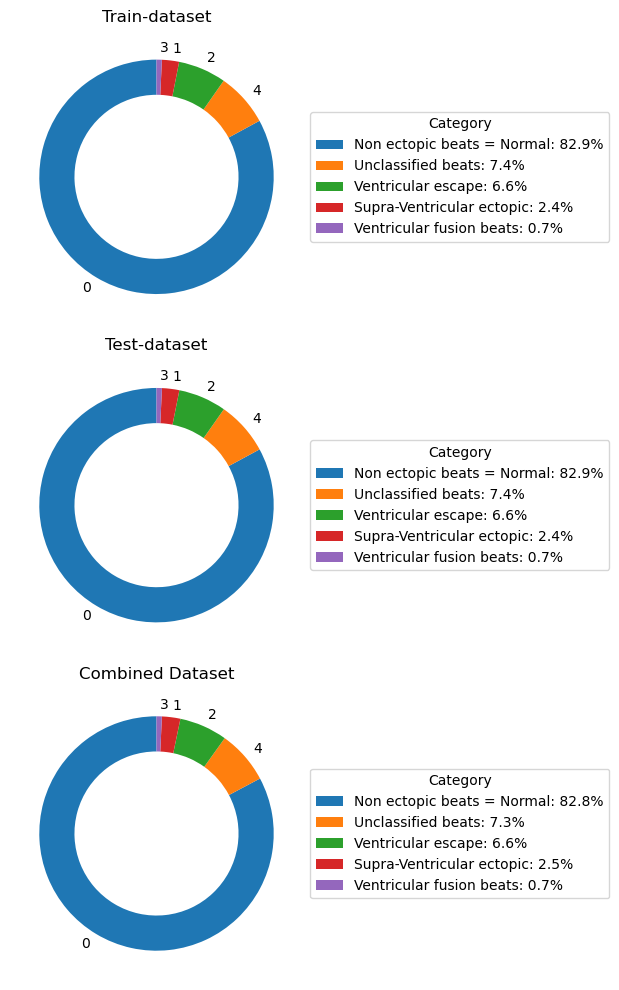

In [87]:
category_counts_test = df_test['Category'].value_counts(normalize=True)
category_counts_train = df_train['Category'].value_counts(normalize=True)
category_counts_gesamt = df['Category'].value_counts(normalize=True)

# Berechnung der Prozentwerte
def calculate_percentages(counts):
    return [f'{pct:.1f}%' for pct in 100 * counts / counts.sum()]

# Dictionary der Kategorien
category_definitions = {
    0: 'Non ectopic beats = Normal',
    1: 'Supra-Ventricular ectopic',
    2: 'Ventricular escape',
    3: 'Ventricular fusion beats',
    4: 'Unclassified beats'
}

# Labels für die Legende
def get_labels_with_pct(counts):
    percentages = calculate_percentages(counts)
    return [f'{category_definitions[label]}: {pct}' for label, pct in zip(counts.index, percentages)]

# Erstellen der Subplots

fig, axs = plt.subplots(3, 1, figsize=(9, 10), subplot_kw=dict(aspect="equal"))

# Trainings-Datensatz
wedges, texts = axs[0].pie(category_counts_train, labels=category_counts_train.index, autopct=None,
                          startangle=90, wedgeprops=dict(width=0.3), textprops={'fontsize': 10})
axs[0].set_title('Train-dataset')
percentages_train = calculate_percentages(category_counts_train)
labels_with_pct_train = get_labels_with_pct(category_counts_train)
axs[0].legend(wedges, labels_with_pct_train, title="Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


# Test-Datensatz
wedges, texts = axs[1].pie(category_counts_test, labels=category_counts_test.index, autopct=None,
                          startangle=90, wedgeprops=dict(width=0.3), textprops={'fontsize': 10})
axs[1].set_title('Test-dataset')
percentages_test = calculate_percentages(category_counts_test)
labels_with_pct_test = get_labels_with_pct(category_counts_test)
axs[1].legend(wedges, labels_with_pct_test, title="Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


# Gesamtdatensatz
wedges, texts = axs[2].pie(category_counts_gesamt, labels=category_counts_gesamt.index, autopct=None,
                          startangle=90, wedgeprops=dict(width=0.3), textprops={'fontsize': 10})
axs[2].set_title('Combined Dataset')
percentages_gesamt = calculate_percentages(category_counts_gesamt)
labels_with_pct_gesamt = get_labels_with_pct(category_counts_gesamt)
axs[2].legend(wedges, labels_with_pct_gesamt, title="Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Layout-Anpassungen
plt.tight_layout()
plt.show()
fig.savefig("DataExploration_Targetvariable.png")

__Data overview (2):__
- Different Categories are not equally distributed. 
- Over/Undersampling will be necessary in the classification process. 

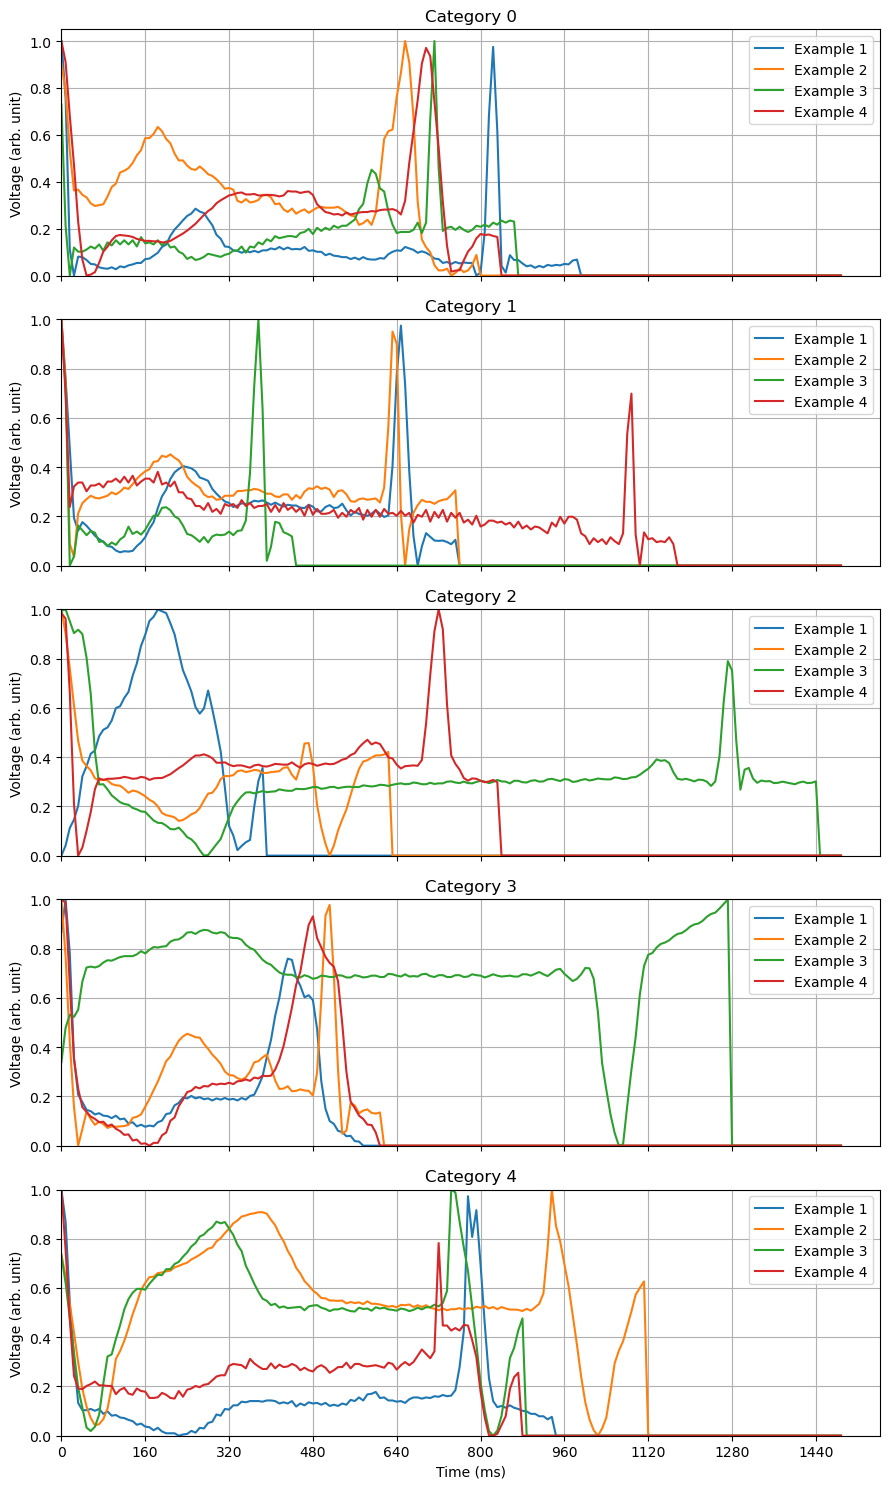

In [151]:
# Explanatory graphs from the test dataset
categories_of_interest = df_test['Category'].unique()
# Figur mit mehreren Unterdiagrammen
num_categories = len(categories_of_interest)
fig, axs = plt.subplots(num_categories, 1, figsize=(9, 3 * num_categories), sharex=True)

# Plot for each category
for idx, category in enumerate(categories_of_interest):
    # Category filter
    filtered_df = df_test[df_test['Category'] == category]
    
    # Exemplarische Reihen
    num_exemplars = 4  # Anzahl der exemplarischen Reihen pro Kategorie
    for i in range(min(num_exemplars, len(filtered_df))):
        row = filtered_df.iloc[i, :-1]  # Alle Spalten außer der Kategorie-Spalte
        axs[idx].plot(row, label=f'Example {i+1}')
        
    # Achsenbeschriftungen und Titel für jedes Subplot
    axs[idx].set_ylabel('Voltage (arb. unit)')
    axs[idx].set_title(f'Category {category}')
    axs[idx].legend()
    axs[idx].grid(True)
      # Anpassung der X-Achsen-Beschriftungen
    step = 20  # Nur jede 20. Beschriftung zeigen
    # Zeit in ms für die Ticks berechnen
    ticks = np.arange(0, 187, step)
    tick_labels = [f'{i * 8}' for i in ticks]
    axs[idx].set_xticks(ticks)
    axs[idx].set_xticklabels(tick_labels)
    # Grenzen setzen X-Achse
    axs[idx].set_xlim(left=0)  # Setzt die untere Grenze auf 0
    # Grenzen setzen y-achse
    for ax in axs:
        ax.set_ylim(bottom=0)  # Setzt die untere Grenze der Y-Achse auf 0
    
# Gemeinsame X-Achsenbeschriftung
plt.xlabel('Time (ms)')

# Layout anpassen
plt.tight_layout()
fig.savefig("DataExploration_exampleTimedata_all_categories.png")

In [11]:
print(f"Anzahl Proben für Kategorie 0: {len(df_test[df_test['Category'] == 0])}")

Anzahl Proben für Kategorie 0: 18110


In [12]:
#Oversampling der Kategorien am Trainingsdatensatz für ausgeglichene Verteilung (Kaggle)
from sklearn.utils import resample
df_1=df_test[df_test['Category']==1]
df_2=df_test[df_test['Category']==2]
df_3=df_test[df_test['Category']==3]
df_4=df_test[df_test['Category']==4]
#Code für die Anzahl der Werte in der 'Kategorie 0'-Spalte:
#df_0=(df_test_copy[df_test_copy['Category']==0]).sample(n=18117,random_state=42)
#Oversampling auf 20.000 für alle Kategorien mit "replace=True"
df_0 = df_test[df_test['Category'] == 0].sample(n=20000, replace=True, random_state=42)

In [13]:
df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

df_test_oversample=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])
df_test_oversample['Category'].value_counts()

Category
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64

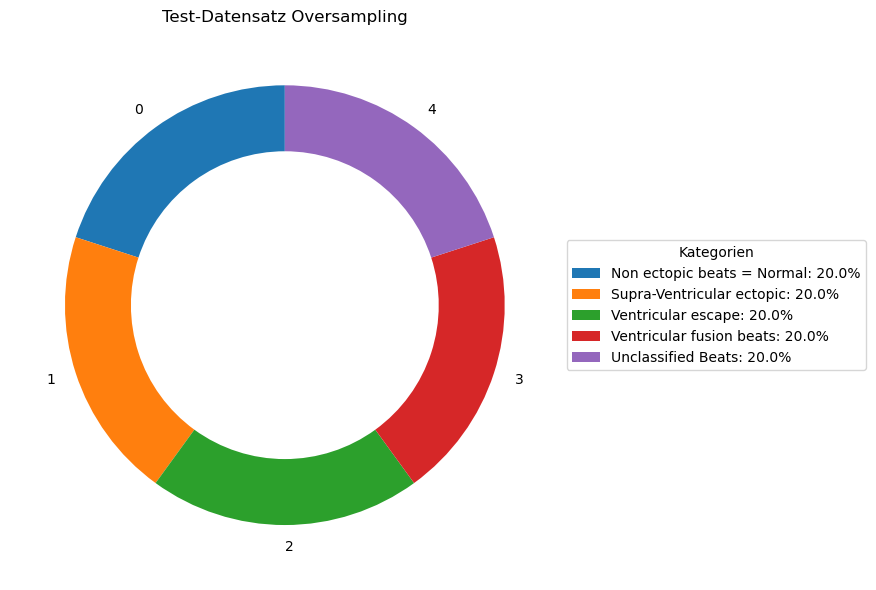

In [14]:
category_counts_test = df_test_oversample['Category'].value_counts()
def calculate_percentages(counts):
    return [f'{pct:.1f}%' for pct in 100 * counts / counts.sum()]

# Dictionary der Kategorien
category_definitions = {
    0: 'Non ectopic beats = Normal',
    1: 'Supra-Ventricular ectopic',
    2: 'Ventricular escape',
    3: 'Ventricular fusion beats',
    4: 'Unclassified Beats'
}

# Labels
def get_labels_with_pct(counts):
    percentages = calculate_percentages(counts)
    return [f'{category_definitions[label]}: {pct}' for label, pct in zip(counts.index, percentages)]

#Subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 6))  # Passe die Größe an deine Anforderungen an


# Diagramm
wedges, texts = axs.pie(category_counts_test, labels=category_counts_test.index, autopct=None,
                       startangle=90, wedgeprops=dict(width=0.3), textprops={'fontsize': 10})

# Berechnung der Prozentsätze und Labels
percentages_test = calculate_percentages(category_counts_test)
labels_with_pct_test = get_labels_with_pct(category_counts_test)

axs.set_title('Test-Datensatz Oversampling')
axs.legend(wedges, labels_with_pct_test, title="Kategorien", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()